In [6]:
# test dataloader
import tensorflow_datasets as tfds

path = '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/0'
datasetbuilder = tfds.builder_from_directory(path)

print(datasetbuilder)


In [7]:
#  Date: 2025-02-18 BUG: 用minivla 的conda 环境读发现会报tensorflow 版本的错误，我担心会导致openvla 训练的时候读取数据失败
dataset = datasetbuilder.as_dataset(split='train')


In [24]:
datasetbuilder.info.name

'close the top drawer of the cabinet'

dict_keys(['action', 'discount', 'is_first', 'is_last', 'is_terminal', 'observation', 'reward'])
dict_keys(['agentview_image', 'akita_black_bowl_1_pos', 'akita_black_bowl_1_quat', 'akita_black_bowl_1_to_robot0_eef_pos', 'akita_black_bowl_1_to_robot0_eef_quat', 'butter_1_pos', 'butter_1_quat', 'butter_1_to_robot0_eef_pos', 'butter_1_to_robot0_eef_quat', 'butter_2_pos', 'butter_2_quat', 'butter_2_to_robot0_eef_pos', 'butter_2_to_robot0_eef_quat', 'chocolate_pudding_1_pos', 'chocolate_pudding_1_quat', 'chocolate_pudding_1_to_robot0_eef_pos', 'chocolate_pudding_1_to_robot0_eef_quat', 'object-state', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_proprio-state'])


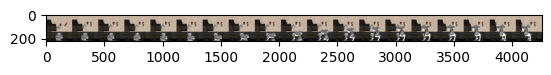

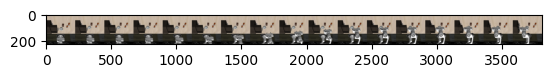

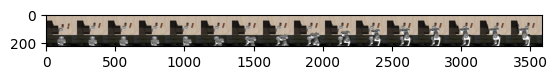

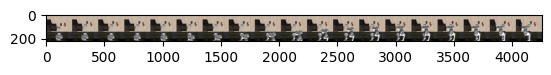

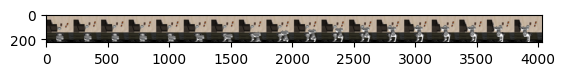

In [ ]:
# visualize dataset
import numpy as np 
import matplotlib.pyplot as plt

for i, episode in enumerate(dataset.take(5)):
    images = []
    for step in episode['steps']:
        images.append(step['observation']['agentview_image'].numpy())
    image_strip = np.concatenate(images[::4], axis=1)
    # caption = step['language_instruction'].numpy().decode() + ' (temp. downsampled 4x)'

    plt.figure()
    plt.imshow(image_strip)
    # plt.title(caption)
print(step.keys())
print(step['observation'].keys())

In [ ]:
import glob
overview_path = "/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test"
episode_paths = glob.glob(overview_path + "/*") # 获取所有episode 的路径
episode_paths

['/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test.txt',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/0',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/1',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/10',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/11',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/12',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/13',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/14',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/15',
 '/home/v-rusyang/shared_data/dataset/COLLECT-libero_90-minivla-2025_02_11-09_20_30--test/16',